![sql](img/sql-logo.jpg)

# A beginner's guide to databases, SQL, & using them with `Pandas`

## Learning goals:
- **Goal 1.** Summarize the use case for sql in the data science skill set


- **Goal 2.** Define key sql terminology


- **Goal 3.** Get information about DB schema and table structure


- **Goal 4.** Use basic SQL commands and construct simple SQL queries


- **Goal 5.** Convert SQL to pandas


- **Goal 6.** Identify main JOIN options

##  Summarize

[Netflix has a great article](https://medium.com/netflix-techblog/notebook-innovation-591ee3221233) describing three different data roles at their company, their different needs, and their toolsets.

![netflix](img/netflix-data-roles.jpeg)

Examining that graphic, SQL shows up as one of the tools of the _Data Engineer_ 

Data Engineers provide the essential data architecture services that make data science possible.

![hierarchy](img/ai-hierachy.png)

[Source: Monica Rogati’s fantastic Medium post “The AI Hierarchy of Needs”
](https://hackernoon.com/the-ai-hierarchy-of-needs-18f111fcc007)

![etl](img/etl.png)

[img source: Jeff Hammerbacher’s slide from UC Berkeley CS 194 course ](https://bcourses.berkeley.edu/courses/1377158/pages/cs-194-16-introduction-to-data-science-fall-2015)

### What is a Relational Database? 

![rdb](img/relational-dbms-model.png)
[reference for image ](https://www.studytonight.com/dbms/database-model.php)

### POPULAR RDBMS

- SQLite
- MySQL
- PostgreSql
- Oracle DB
- SQL Server

***
##  Database terminology

### Relational Database Schema

![schema](img/MySQL_Schema_Music_Example.png)

[source of image](https://database.guide/what-is-a-database-schema/)

### Table columns view
![table example](img/columns.png)

### Terminology

- PRIMARY KEY: uniquely identifies a record (row) in the table.  


- FOREIGN KEY: a field in the table that is primary key in another table. Links two tables.  


- SCHEMA:  
   The structure/layout of the database (table, columns, relationships) 


- STRUCTURED QUERIES  
   Our queries require us to follow a specific format  


- VIEWS  
  Built on top of tables, almost like a sub-table  
  E.g. Classical Music Albums is View of the Albums Table  
 

***
## SQLite

![sqlite](img/SQLite-Python.jpg)

### What Is SQLite?
SQLite is a C-language library that implements a small, fast, self-contained, high-reliability, full-featured, SQL database engine. SQLite is the most used database engine in the world. SQLite is built into all mobile phones and most computers and comes bundled inside countless other applications that people use every day. [More Information...](https://www.sqlite.org/about.html)

### SQLite Documentation
- [sqlite documentation](https://docs.python.org/2/library/sqlite3.html)

## But what about connecting to database servers?

To connect to other database types there are many different libraries:
- Oracle: [cx_Oracle](https://oracle.github.io/python-cx_Oracle/)
- MySQL: [MySQL-python](https://github.com/farcepest/MySQLdb1)
- PostgreSQL: [Psycopg2](http://initd.org/psycopg/docs/)
- Microsoft SQL Server: [pymssql](http://www.pymssql.org/en/stable/)

These all implement [PEP 249: DB API v2](https://www.python.org/dev/peps/pep-0249/)

**Scenario:** You are a data analyst for the Homeland Security, trying to create reports on the active airports world wide. The data you need to access is in a SQL database. You need to be able to query for the data in a database!

### Import Packages 

In [1]:
import sqlite3

[DB Browser for SQLite](https://sqlitebrowser.org/about/)

### Load a DB object with `connect` and `cursor`

In [2]:
## Con and Cursor are SQLight objects that allow us to connect to the database and execute queries 
# .db indicates that you are connecting to a database
con = sqlite3.connect('flights.db')
cursor = con.cursor()

### Understand you DB Schema

#### Use sqlite_master to find all the tables in the schema
Get the schema of a database from a db in sqlite

In [3]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
## This returns a cursor object. To see the outputs, you have to use a fetchall method

In [4]:
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
cursor.fetchall()

[('airports',), ('airlines',), ('routes',)]

#### Get information about one table

In [5]:
## Use description to see column names for the airports table
cursor.execute("SELECT * FROM airports")
cursor.description

(('index', None, None, None, None, None, None),
 ('id', None, None, None, None, None, None),
 ('name', None, None, None, None, None, None),
 ('city', None, None, None, None, None, None),
 ('country', None, None, None, None, None, None),
 ('code', None, None, None, None, None, None),
 ('icao', None, None, None, None, None, None),
 ('latitude', None, None, None, None, None, None),
 ('longitude', None, None, None, None, None, None),
 ('altitude', None, None, None, None, None, None),
 ('offset', None, None, None, None, None, None),
 ('dst', None, None, None, None, None, None),
 ('timezone', None, None, None, None, None, None))

In [6]:
## Use description to see column names for the airlines table
cursor.execute("SELECT * FROM airlines")
cursor.description

(('index', None, None, None, None, None, None),
 ('id', None, None, None, None, None, None),
 ('name', None, None, None, None, None, None),
 ('alias', None, None, None, None, None, None),
 ('iata', None, None, None, None, None, None),
 ('icao', None, None, None, None, None, None),
 ('callsign', None, None, None, None, None, None),
 ('country', None, None, None, None, None, None),
 ('active', None, None, None, None, None, None))

In [7]:
## Use description to see column names for the routes table
cursor.execute("SELECT * FROM routes")
cursor.description

(('index', None, None, None, None, None, None),
 ('airline', None, None, None, None, None, None),
 ('airline_id', None, None, None, None, None, None),
 ('source', None, None, None, None, None, None),
 ('source_id', None, None, None, None, None, None),
 ('dest', None, None, None, None, None, None),
 ('dest_id', None, None, None, None, None, None),
 ('codeshare', None, None, None, None, None, None),
 ('stops', None, None, None, None, None, None),
 ('equipment', None, None, None, None, None, None))

#### Or use `Pragma`
`Pragma` tool [link here](https://www.sqlite.org/pragma.html#pragma_table_info)

**output**<br>
`(column id, column name, data type, whether or not the column can be NULL, and the default value for the column)`


In [8]:
## Use pragma to see column names and info for the airports table
cursor.execute("PRAGMA table_info(airports)")
info = cursor.fetchall()
print(*info, sep = "\n") 

(0, 'index', 'INTEGER', 0, None, 0)
(1, 'id', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'city', 'TEXT', 0, None, 0)
(4, 'country', 'TEXT', 0, None, 0)
(5, 'code', 'TEXT', 0, None, 0)
(6, 'icao', 'TEXT', 0, None, 0)
(7, 'latitude', 'TEXT', 0, None, 0)
(8, 'longitude', 'TEXT', 0, None, 0)
(9, 'altitude', 'TEXT', 0, None, 0)
(10, 'offset', 'TEXT', 0, None, 0)
(11, 'dst', 'TEXT', 0, None, 0)
(12, 'timezone', 'TEXT', 0, None, 0)


In [9]:
## Use pragma to see column names and info for the airlines table
cursor.execute("PRAGMA table_info(airlines)")
info = cursor.fetchall()
print(*info, sep = "\n") 

(0, 'index', 'INTEGER', 0, None, 0)
(1, 'id', 'TEXT', 0, None, 0)
(2, 'name', 'TEXT', 0, None, 0)
(3, 'alias', 'TEXT', 0, None, 0)
(4, 'iata', 'TEXT', 0, None, 0)
(5, 'icao', 'TEXT', 0, None, 0)
(6, 'callsign', 'TEXT', 0, None, 0)
(7, 'country', 'TEXT', 0, None, 0)
(8, 'active', 'TEXT', 0, None, 0)


In [10]:
## Use pragma to see column names and info for the routes table
cursor.execute("PRAGMA table_info(routes)")
info = cursor.fetchall()
print(*info, sep = "\n") 

(0, 'index', 'INTEGER', 0, None, 0)
(1, 'airline', 'TEXT', 0, None, 0)
(2, 'airline_id', 'TEXT', 0, None, 0)
(3, 'source', 'TEXT', 0, None, 0)
(4, 'source_id', 'TEXT', 0, None, 0)
(5, 'dest', 'TEXT', 0, None, 0)
(6, 'dest_id', 'TEXT', 0, None, 0)
(7, 'codeshare', 'TEXT', 0, None, 0)
(8, 'stops', 'TEXT', 0, None, 0)
(9, 'equipment', 'TEXT', 0, None, 0)


**A note about** `execute`<br>
Each time you use it, you reset the value of cursor

In [11]:
cursor.execute("SELECT * FROM airports")

In [12]:
# returns a tuple (immutable)
## each time you run this it will print the next row 
### you have to rerun cursor.execute for it to restart back at the first record
cursor.fetchone()

(0,
 '1',
 'Goroka',
 'Goroka',
 'Papua New Guinea',
 'GKA',
 'AYGA',
 '-6.081689',
 '145.391881',
 '5282',
 '10',
 'U',
 'Pacific/Port_Moresby')

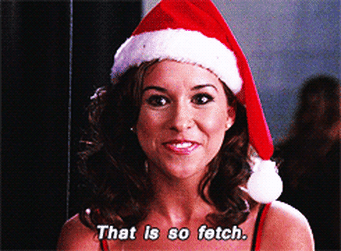

#### Making fetch happen

`.fetchall()` is how you get the query results out of the object.

You can also `.fetchone()` or `.fetchmany()`

**Task:** Get the descriptive data for airlines and routes tables

In [13]:
# Fetches all columns and records from the airports table into a list
# Note: each record is in the format of a tuple
cursor.execute("SELECT * FROM airports").fetchall()

[(0,
  '1',
  'Goroka',
  'Goroka',
  'Papua New Guinea',
  'GKA',
  'AYGA',
  '-6.081689',
  '145.391881',
  '5282',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (1,
  '2',
  'Madang',
  'Madang',
  'Papua New Guinea',
  'MAG',
  'AYMD',
  '-5.207083',
  '145.7887',
  '20',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (2,
  '3',
  'Mount Hagen',
  'Mount Hagen',
  'Papua New Guinea',
  'HGU',
  'AYMH',
  '-5.826789',
  '144.295861',
  '5388',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (3,
  '4',
  'Nadzab',
  'Nadzab',
  'Papua New Guinea',
  'LAE',
  'AYNZ',
  '-6.569828',
  '146.726242',
  '239',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (4,
  '5',
  'Port Moresby Jacksons Intl',
  'Port Moresby',
  'Papua New Guinea',
  'POM',
  'AYPY',
  '-9.443383',
  '147.22005',
  '146',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (5,
  '6',
  'Wewak Intl',
  'Wewak',
  'Papua New Guinea',
  'WWK',
  'AYWK',
  '-3.583828',
  '143.669186',
  '19',
  '10',
  'U',
  'Pacific/Port_Moresby'),
 (6,
  '7'

In [16]:
#returns a lists of two tuples from the airports table
cursor.execute("SELECT * FROM airports")
cursor.fetchmany()

[(0,
  '1',
  'Goroka',
  'Goroka',
  'Papua New Guinea',
  'GKA',
  'AYGA',
  '-6.081689',
  '145.391881',
  '5282',
  '10',
  'U',
  'Pacific/Port_Moresby')]

In [15]:
# Returns just one tuple, not in a list.
cursor.execute("SELECT * FROM airports")
cursor.fetchone()

(0,
 '1',
 'Goroka',
 'Goroka',
 'Papua New Guinea',
 'GKA',
 'AYGA',
 '-6.081689',
 '145.391881',
 '5282',
 '10',
 'U',
 'Pacific/Port_Moresby')

***
## Construct SQL queries

**Select**

**From**

**Where**

**Order by**

**Limit**

#### Options for each:

**Select**:  `distinct`, using `as` to rename columns, single number aggregates  


**From:** also uses aliasing with `as`  


**Where**: equals is only one `=`, `between`, `in`, wildcards `%`, `AND`, `OR`, `NOT`  


**Order by**: `asc` and `desc`  


**Limit**:  #  





**Task**: 
- Select only active airlines in the UK from the airlines table
- Select the unique list of countries with airports

In [18]:
cursor.execute("SELECT active FROM airlines")
cursor.fetchall()

[('Y',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('Y',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('Y',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('Y',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('n',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('N',),
 ('Y',),
 ('N',),
 ('N',),
 ('Y',),
 ('Y',),
 ('N',),
 

In [19]:
# Select only active airlines in the UK from the airlines table
cursor.execute("SELECT * FROM airlines where active = 'Y' and country = 'United Kingdom'")
cursor.fetchall()

[(111,
  '112',
  'Astraeus',
  '\\N',
  '5W',
  'AEU',
  'FLYSTAR',
  'United Kingdom',
  'Y'),
 (491,
  '492',
  'Air Southwest',
  '\\N',
  None,
  'WOW',
  'SWALLOW',
  'United Kingdom',
  'Y'),
 (507,
  '508',
  'Aurigny Air Services',
  '\\N',
  'GR',
  'AUR',
  'AYLINE',
  'United Kingdom',
  'Y'),
 (564,
  '565',
  'Air Wales',
  '\\N',
  '6G',
  'AWW',
  'RED DRAGON',
  'United Kingdom',
  'Y'),
 (664,
  '665',
  'AD Aviation',
  '\\N',
  None,
  'VUE',
  'FLIGHTVUE',
  'United Kingdom',
  'Y'),
 (689, '690', 'Air Foyle', '\\N', 'GS', 'UPA', 'FOYLE', 'United Kingdom', 'Y'),
 (1353,
  '1355',
  'British Airways',
  '\\N',
  'BA',
  'BAW',
  'SPEEDBIRD',
  'United Kingdom',
  'Y'),
 (1409,
  '1411',
  'British International Helicopters',
  '\\N',
  'BS',
  'BIH',
  'BRINTEL',
  'United Kingdom',
  'Y'),
 (1435,
  '1437',
  'bmi',
  'bmi British Midland',
  'BD',
  'BMA',
  'MIDLAND',
  'United Kingdom',
  'Y'),
 (1439, '1441', 'bmibaby', '\\N', 'WW', 'BMI', 'BABY', 'United Kingd

In [21]:
# Select the unique list of countries with airports
cursor.execute("Select distinct country From airports")
cursor.fetchall()

[('Papua New Guinea',),
 ('Greenland',),
 ('Iceland',),
 ('Canada',),
 ('Algeria',),
 ('Benin',),
 ('Burkina Faso',),
 ('Ghana',),
 ("Cote d'Ivoire",),
 ('Nigeria',),
 ('Niger',),
 ('Tunisia',),
 ('Togo',),
 ('Belgium',),
 ('Germany',),
 ('United States',),
 ('Estonia',),
 ('Finland',),
 ('United Kingdom',),
 ('Guernsey',),
 ('Jersey',),
 ('Isle of Man',),
 ('Falkland Islands',),
 ('Netherlands',),
 ('Ireland',),
 ('Denmark',),
 ('Faroe Islands',),
 ('Luxembourg',),
 ('Norway',),
 ('Poland',),
 ('Sweden',),
 ('South Africa',),
 ('Botswana',),
 ('Congo (Brazzaville)',),
 ('Congo (Kinshasa)',),
 ('Swaziland',),
 ('Central African Republic',),
 ('Equatorial Guinea',),
 ('Saint Helena',),
 ('Mauritius',),
 ('British Indian Ocean Territory',),
 ('Cameroon',),
 ('Zambia',),
 ('Comoros',),
 ('Mayotte',),
 ('Reunion',),
 ('Madagascar',),
 ('Angola',),
 ('Puerto Rico',),
 ('Gabon',),
 ('Sao Tome and Principe',),
 ('Mozambique',),
 ('Seychelles',),
 ('Chad',),
 ('Zimbabwe',),
 ('Malawi',),
 ('Le

## Transfering from sqlite to pandas

In [22]:
import pandas as pd

In [26]:
conn = sqlite3.connect("flights.db")
df = pd.read_sql_query("select * from airports limit 5", conn)

**Task**: 
Convert one of the earlier queries in the lesson to a pandas data frame

In [28]:
conn = sqlite3.connect("flights.db")
df = pd.read_sql_query("SELECT * FROM airlines where active = 'Y'", conn)
df

,index,id,name,alias,iata,icao,callsign,country,active
0,0,1,Private flight,\N,-,None,None,None,Y
1,2,3,1Time Airline,\N,1T,RNX,NEXTIME,South Africa,Y
2,9,10,40-Mile Air,\N,Q5,MLA,MILE-AIR,United States,Y
3,12,13,Ansett Australia,\N,AN,AAA,ANSETT,Australia,Y
4,13,14,Abacus International,\N,1B,None,None,Singapore,Y
5,20,21,Aigle Azur,\N,ZI,AAF,AIGLE AZUR,France,Y
6,21,22,Aloha Airlines,\N,AQ,AAH,ALOHA,United States,Y
7,23,24,American Airlines,\N,AA,AAL,AMERICAN,United States,Y
8,27,28,Asiana Airlines,\N,OZ,AAR,ASIANA,Republic of Korea,Y
9,28,29,Askari Aviation,\N,4K,AAS,AL-AAS,Pakistan,Y


In [29]:
conn.close()

# Additional Resources and Practice

### Grouping statements

Combines `select` and `group by` when you want aggregates by values

`select` `min(x)` ... `max()`, `sum()`, etc

`group by x`